# **Face Mask Detection**

### **Dataset Import from Kaggle**


In [ ]:
!pip install kaggle

In [ ]:
print("Please upload 'Kaggle.json' file\n\n")
from google.colab import files
files.upload()

Please upload 'Kaggle.json' file




{}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d andrewmvd/face-mask-detection

100% 397M/398M [00:01<00:00, 198MB/s]
100% 398M/398M [00:02<00:00, 206MB/s]


In [ ]:
from zipfile import ZipFile
file_name="/content/face-mask-detection.zip"

with ZipFile(file_name,'r')as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
for dirname, _, filenames in os.walk('/content/annotations'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/images/maksssksksss409.png
/content/images/maksssksksss479.png
/content/images/maksssksksss476.png
/content/images/maksssksksss517.png
/content/images/maksssksksss746.png
/content/images/maksssksksss30.png
/content/images/maksssksksss791.png
/content/images/maksssksksss385.png
/content/images/maksssksksss299.png
/content/images/maksssksksss84.png
/content/images/maksssksksss65.png
/content/images/maksssksksss31.png
/content/images/maksssksksss244.png
/content/images/maksssksksss575.png
/content/images/maksssksksss460.png
/content/images/maksssksksss155.png
/content/images/maksssksksss193.png
/content/images/maksssksksss242.png
/content/images/maksssksksss29.png
/content/images/maksssksksss293.png
/content/images/maksssksksss26.png
/content/images/maksssksksss840.png
/content/images/maksssksksss256.png
/content/images/maksssksksss789.png
/content/images/maksssksksss440.png
/content/images/maksssksksss246.png
/content/images/maksssksksss592.png
/content/images/maksssksksss41.png

In [ ]:
images_dir = os.path.join('/content/images')
images_name= os.listdir(images_dir)

### **Face and respective Class Extraction**

In [ ]:
from bs4 import BeautifulSoup as XML_extract
import numpy as np
import pandas as pd 
import random as rand
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

def face_location(obj):  
    widthleft = int(obj.find('xmin').text)
    heightlow = int(obj.find('ymin').text)
    widthright = int(obj.find('xmax').text)
    heightup = int(obj.find('ymax').text)    
    return [widthleft, heightlow, widthright, heightup]

In [ ]:
def required(image_id, file): 
    with open(file) as f:
        face_width = []
        labels = []
        data = f.read()
        face_type = XML_extract(data, 'xml')
        face_type_object = face_type.find_all('object')
        num_face_type_objects = len(face_type_object)
        for i in face_type_object:
            flag=2
            face_width.append(face_location(i))
            if i.find('name').text=="with_mask":
              flag=1
            elif i.find('name').text=="without_mask":
              flag=0
            labels.append(flag)
        face_width=np.array(face_width)
        labels=np.array(labels)
        img_id = np.array(image_id)
        target = {}
        target["boxes"] = face_width
        target["labels"] = labels        
        return (target,num_face_type_objects)

In [ ]:
imgs = list(sorted(os.listdir("/content/images")))
len(imgs)

853

In [ ]:
labels = list(sorted(os.listdir("/content/annotations")))

In [ ]:
targets=[]
numobjs=[]
for i in range(853):
    file_image = 'maksssksksss'+ str(i) + '.png'
    file_label = 'maksssksksss'+ str(i) + '.xml'
    img_path = os.path.join("/content/images/", file_image)
    label_path = os.path.join("/content/annotations/", file_label)
    target,numobj = required(i, label_path)
    targets.append(target)
    numobjs.append(numobj)

In [ ]:
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
face_images=[]
face_labels=[]
for i in range(853):
    img_path = r"../content/images/maksssksksss{}.png".format(i)
    img = cv2.imread(img_path)
    for j in range(numobjs[i]): 
        locs=(targets[i]['boxes'][j])
        img1=img[locs[1]:locs[3],locs[0]:locs[2]]
        img1 = cv2.resize(img1, (100, 100))
        img1 = img_to_array(img1)
        img1 = preprocess_input(img1)
        face_images.append(img1)
        face_labels.append(targets[i]['labels'][j])

face_images= np.array(face_images, dtype="float32")
face_labels = np.array(face_labels)


In [ ]:
face_labels

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
face_images.shape

(4072, 100, 100, 3)

In [ ]:
classification=[]
without_mask_array=[1,0,0]
with_mask_array=[0,1,0]
incorrectly_array=[0,0,1]
for i in range(len(face_labels)):
  if face_labels[i]==0:
    classification.append(without_mask_array)
  elif face_labels[i]==1:
    classification.append(with_mask_array)
  elif face_labels[i]==2:
    classification.append(incorrectly_array)

classification=np.array(classification)
classification=np.float32(classification)
classification  

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
withmask=[]
withoutmask=[]
incorrect=[]

In [ ]:
for i in range(len(classification)):
  if classification[i][1]==1:
    withmask.append(face_images[i])
  elif classification[i][0]==1:
    withoutmask.append(face_images[i])
  elif classification[i][2]==1:
    incorrect.append(face_images[i])

In [ ]:
num_withmask=len(withmask)
num_withoutmask=len(withoutmask)
num_incorrect=len(incorrect)
Y=[]
Y.append(num_withoutmask)
Y.append(num_withmask)
Y.append(num_incorrect)

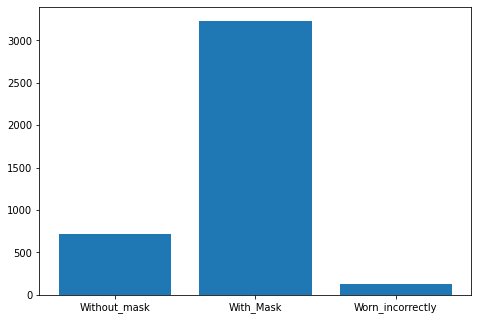

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Without_mask', 'With_Mask', 'Worn_incorrectly']
ax.bar(langs,Y)
plt.show()

In [ ]:
feature_vector_length=30000
input_shape = (feature_vector_length,)
face_images = face_images.reshape(face_images.shape[0],feature_vector_length,)
face_images.shape

(4072, 30000)

### **Model architecture**

In [ ]:
from tensorflow.keras.layers import MaxPooling2D as pooling2x2
from tensorflow.keras.layers import Dropout,BatchNormalization
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Dense as neuron
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D as convulation_layer
from tensorflow.keras.models import Sequential

model = Sequential([
    neuron(1000, input_shape=input_shape, activation='relu'),
    Dropout(0.5),
    #neuron(1000, activation='relu'),
    neuron(100, activation='relu'),
    neuron(3,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              30001000  
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               100100    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 30,101,403
Trainable params: 30,101,403
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import SGD
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.001),
              metrics=['accuracy'])

### **Training of Model and Calculation of Accuracy**



> Split in Train and Test



In [ ]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(face_images, classification,
	test_size=0.2, stratify=classification, random_state=42)



> Training of Model


In [ ]:
history=model.fit(trainX, trainY, epochs=20, batch_size=32, verbose=1, validation_data=(testX, testY))

Epoch 1/20
102/102 [==============================] - 1s 9ms/step - loss: 0.4654 - accuracy: 0.8155 - val_loss: 0.3501 - val_accuracy: 0.9080
Epoch 2/20
102/102 [==============================] - 1s 7ms/step - loss: 0.3063 - accuracy: 0.9057 - val_loss: 0.3010 - val_accuracy: 0.9178
Epoch 3/20
102/102 [==============================] - 1s 7ms/step - loss: 0.2656 - accuracy: 0.9156 - val_loss: 0.2843 - val_accuracy: 0.9153
Epoch 4/20
102/102 [==============================] - 1s 7ms/step - loss: 0.2399 - accuracy: 0.9211 - val_loss: 0.2758 - val_accuracy: 0.9239
Epoch 5/20
102/102 [==============================] - 1s 7ms/step - loss: 0.2341 - accuracy: 0.9254 - val_loss: 0.2638 - val_accuracy: 0.9227
Epoch 6/20
102/102 [==============================] - 1s 7ms/step - loss: 0.2102 - accuracy: 0.9315 - val_loss: 0.2630 - val_accuracy: 0.9239
Epoch 7/20
102/102 [==============================] - 1s 7ms/step - loss: 0.1997 - accuracy: 0.9355 - val_loss: 0.2450 - val_accuracy: 0.9325
Epoch 

In [ ]:
model.evaluate(testX,testY)

26/26 [==============================] - 0s 4ms/step - loss: 0.2199 - accuracy: 0.9387


[0.2198839634656906, 0.9386503100395203]